In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import warnings
import math
from pathlib import Path
# Using pyplot label '_nolegend_' outputs a bunch of warnings, hence:
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')



plt.style.use('default') # or dark if that's your thing

def compare_metrics(metric: str, experiments, output_name: str, only_smooth: bool):
    fig, ax = plt.subplots(1,1)
    path_prefix = '../'
    path_postfix = 'logs/scalars.json'
    min_steps = math.inf
    for experiment in experiments:
        path = Path(path_prefix, experiment_information[experiment]['path_to_scalars_json'], path_postfix)
        df = pd.read_json(path, lines=True)
        ax.set_title(metric)
        filtered_df = df[['global_step', metric]]
        filtered_df = filtered_df.dropna(subset=[metric], inplace=False)
        steps = filtered_df['global_step'].values[-1]
        if steps < min_steps:
            min_steps = steps
        smoothed = filtered_df.ewm(alpha=0.6).mean()
        if not only_smooth:
            filtered_df.plot(x='global_step', y=metric, ylabel=metric, label='_nolegend_', color=experiment_information[experiment]['plot_color'], alpha=0.4, ax=ax)
        smoothed.plot(x='global_step', y=metric, ylabel=metric, label=experiment, color=experiment_information[experiment]['plot_color'], ax=ax)
    plt.xlim([0, min_steps])
    plt.savefig(output_name)
    
def compare_and_save_metrics(metrics_to_plot, experiments_to_compare, save_folder, file_prefix, only_smooth=False):
    for metric in metrics_to_plot:
        metric_name = metric.replace("/","-",1)
        save_path = save_folder+file_prefix+'-'+metric_name+'.png'
        if not os.path.exists(save_folder):
          # Create a new directory because it does not exist 
          os.makedirs(save_folder)
          print("Directory created in ", save_folder)
        compare_metrics(metric, experiments_to_compare, save_path, only_smooth)

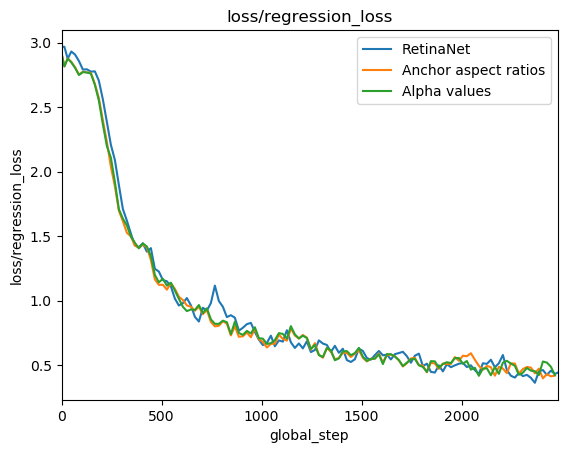

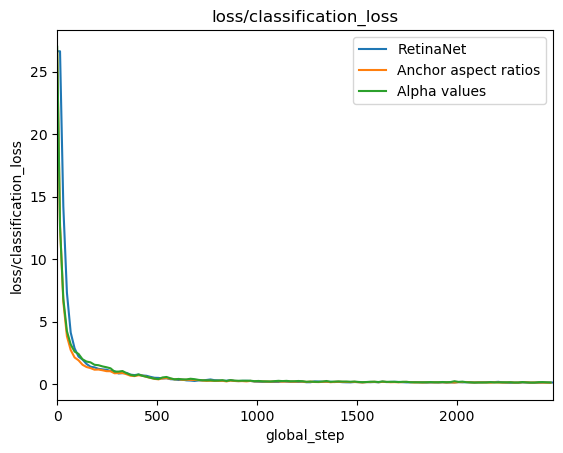

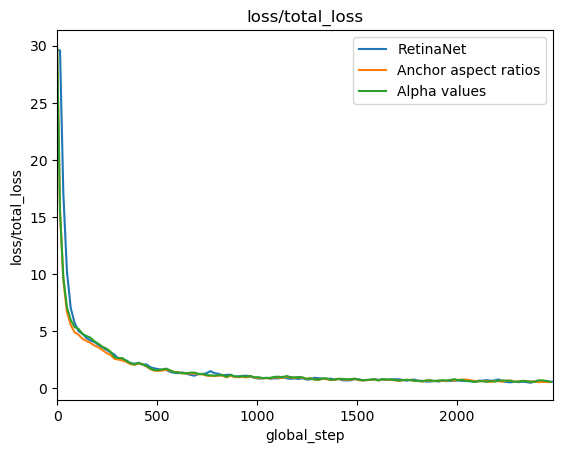

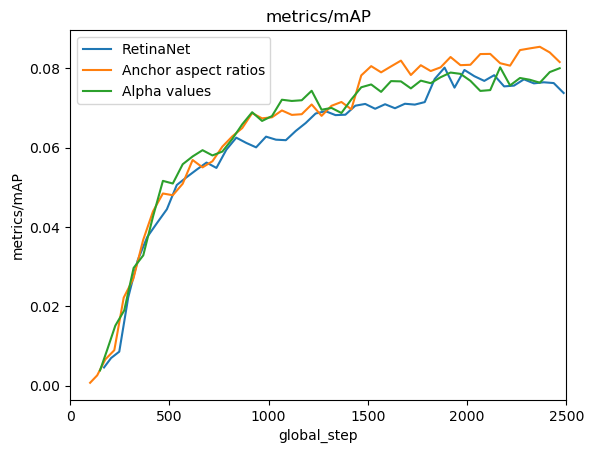

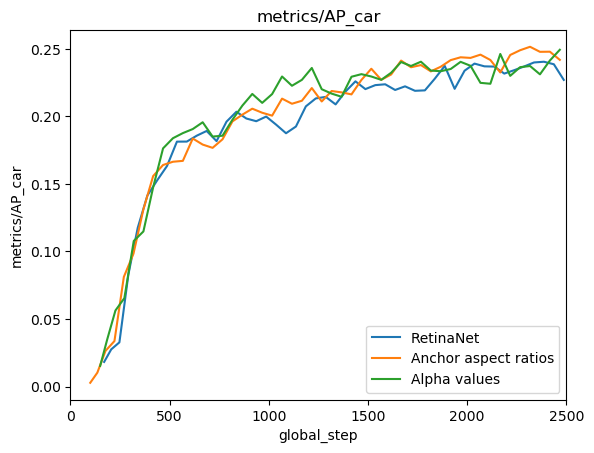

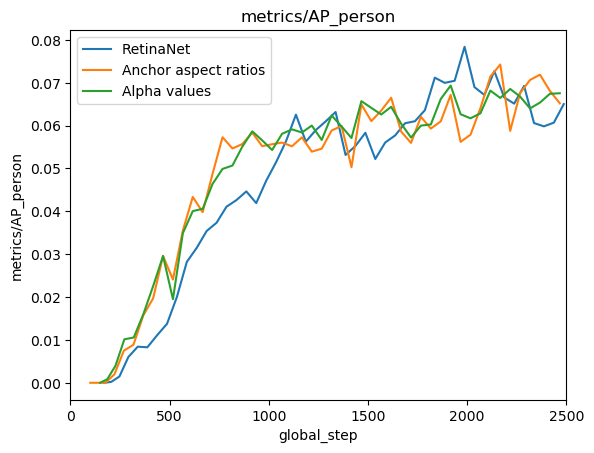

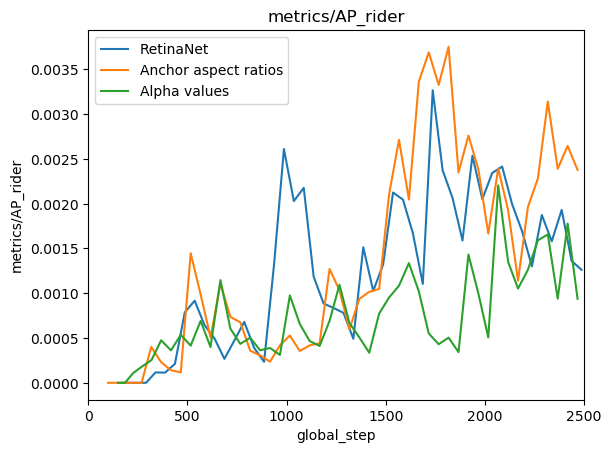

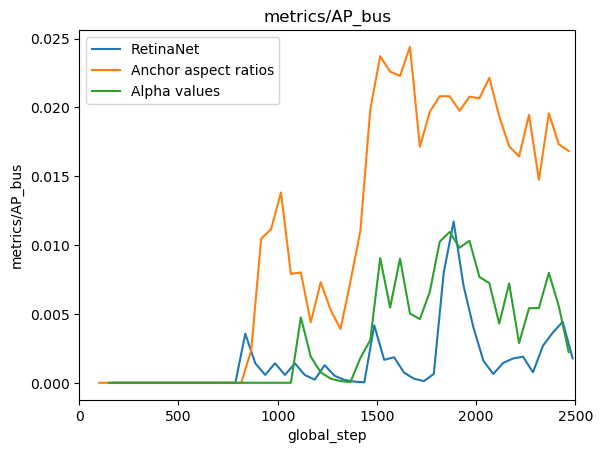

In [46]:
metrics_to_plot = ['loss/regression_loss', 
                   'loss/classification_loss', 
                   'loss/total_loss',
                   'metrics/mAP',
                   'metrics/AP_car',
                   'metrics/AP_person',
                   'metrics/AP_rider',
                   'metrics/AP_bus']

# Note that normally, path_to_scalars_json would be '../outputs/experiment_name/logs/scalars.json'
# For the example, they are in './example_jsons'

# Data augmentation 
# experiment_information = {
#     'Baseline': {
#         'path_to_scalars_json':'ssd_outputs/test_anchors/base',
#         'plot_color':'C0',
#     },
#     'Crop and flip': {
#         'path_to_scalars_json':'ssd_outputs/task2_2_augmentation/data_augmentation',
#         'plot_color':'C1',
#     },
#     'Crop, flip and erase': {
#         'path_to_scalars_json':'ssd_outputs/task2_2_augmentation/data_augmentation_erase',
#         'plot_color':'C2',
#     },
# }

# FPN
# experiment_information = {
#     'Data augmentation': {
#         'path_to_scalars_json':'ssd_outputs/task2_2_augmentation/data_augmentation',
#         'plot_color':'C0',
#     },
#     'Feature pyramid network (254)': {
#         'path_to_scalars_json': 'ssd_outputs/task2_3_retina_net/fpn',
#         'plot_color':'C1',
#     },
#     'Feature pyramid network (128)': {
#         'path_to_scalars_json': 'ssd_outputs/task2_3_retina_net/fpn_128',
#         'plot_color':'C2',
#     },

# Focal loss
experiment_information = {
    'FPN': {
        'path_to_scalars_json': 'ssd_outputs/task2_3_retina_net/fpn',
        'plot_color':'C0',
    },
    'Focal loss': {
        'path_to_scalars_json': 'ssd_outputs/task2_3_retina_net/focal_loss',
        'plot_color':'C2',
    },
}

#Ext heads
# experiment_information = {
#     'Focal loss': {
#         'path_to_scalars_json': 'ssd_outputs/task2_3_retina_net/focal_loss',
#         'plot_color':'C0',
#     },
#     'Extended heads': {
#         'path_to_scalars_json': 'ssd_outputs/task2_3_retina_net/ext_heads_focal',
#         'plot_color':'C1',
#     }
# }

# # Retina net
# experiment_information = {
#     'Baseline': {
#         'path_to_scalars_json':'ssd_outputs/test_anchors/base',
#         'plot_color':'C0',
#     },
#     'Extended heads': {
#         'path_to_scalars_json': 'ssd_outputs/task2_3_retina_net/ext_heads_focal',
#         'plot_color':'C1',
#     },
#     'Improved initialization': {
#         'path_to_scalars_json': 'ssd_outputs/task2_3_retina_net/ext_heads_focal_w_init',
#         'plot_color':'C2',
#     }
# }

# # Adaptions
# experiment_information = {
#     'RetinaNet': {
#         'path_to_scalars_json': 'ssd_outputs/task2_3_retina_net/ext_heads_focal_w_init',
#         'plot_color':'C0',
#     },
#     'Anchor aspect ratios': {
#         'path_to_scalars_json':'ssd_outputs/task2_4_adapt/anchors_AR',
#         'plot_color':'C1',
#     },
#     'Alpha values': {
#         'path_to_scalars_json':'ssd_outputs/task2_4_adapt/fl_alpha',
#         'plot_color':'C2',
#     },
# }

# # Adaptions
experiment_information = {
    'Anchor aspect ratios': {
        'path_to_scalars_json':'ssd_outputs/task2_4_adapt/anchors_AR',
        'plot_color':'C0',
    },
    'Extended dataset': {
        'path_to_scalars_json':'ssd_outputs/task2_5_extended_dataset/extended_dataset',
        'plot_color':'C1',
    },
}





# Note: C0, C1, C2 etc are standard pyplot colors. They go up to C9. Other colors are also accepted :)

# Now, we can save all the desired metrics (defined in metrics_to_plot) in individual files. 
# Note that running this notebook will result in saving a lot of files in '../saved_images/example'
# The plots will be saved to the folder you specify (relative to the notebook location). For example:
compare_and_save_metrics(metrics_to_plot, experiment_information.keys(), '../saved_images/example/', 'ext_dataset', True)
# compare_and_save_metrics(metrics_to_plot[0:2], ['Baseline', 'Change 1'], '../saved_images/example/', 'example-baseline-change1')
# compare_and_save_metrics(metrics_to_plot[0:2], ['Change 1', 'Change 3'], '../saved_images/example/', 'example-change1-change3')